In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
torch.backends.cudnn.bencmark = True
import os,sys,cv2,random,datetime
import argparse
import numpy as np
import zipfile
from dataset import ImageDataset
from matlab_cp2tform import get_similarity_transform_for_cv2
import net_sphere

#import os
#print(os.system('cd /home/steven/mywk/py_project/sphereface_pytorch'))

In [2]:
args_net='sphere20a'
args_lfw='../../dataset/face/lfw/lfw.zip'
args_model='model/sphere20a_20171020.pth'

In [3]:
predicts=[]
net = getattr(net_sphere,args_net)()
net.load_state_dict(torch.load(args_model))

In [4]:
help(net)

Help on sphere20a in module net_sphere object:

class sphere20a(torch.nn.modules.module.Module)
 |  Method resolution order:
 |      sphere20a
 |      torch.nn.modules.module.Module
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, classnum=10574, feature=False)
 |  
 |  forward(self, x)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from torch.nn.modules.module.Module:
 |  
 |  __call__(self, *input, **kwargs)
 |  
 |  __delattr__(self, name)
 |  
 |  __dir__(self)
 |  
 |  __getattr__(self, name)
 |  
 |  __repr__(self)
 |  
 |  __setattr__(self, name, value)
 |  
 |  __setstate__(self, state)
 |  
 |  add_module(self, name, module)
 |      Adds a child module to the current module.
 |      
 |      The module can be accessed as an attribute using the given name.
 |      
 |      Args:
 |          name (string): name of the child module. The child module can be
 |              accessed from this mo

In [5]:
net.cuda()

RuntimeError: CUDA out of memory. Tried to allocate 20.75 MiB (GPU 0; 983.44 MiB total capacity; 86.48 MiB already allocated; 9.56 MiB free; 2.14 MiB cached)

In [6]:
net.eval()
net.feature = True

In [7]:
zfile = zipfile.ZipFile(args_lfw)

In [8]:
landmark = {}
with open('data/lfw_landmark.txt') as f:
    landmark_lines = f.readlines()
for line in landmark_lines:
    l = line.replace('\n','').split('\t')
    landmark[l[0]] = [int(k) for k in l[1:]]

with open('data/pairs.txt') as f:
    pairs_lines = f.readlines()[1:]


In [9]:
p = pairs_lines[0].replace('\n','').split('\t')

In [14]:
#len(p)

In [12]:
if 3==len(p):
  sameflag = 1
  name1 = p[0]+'/'+p[0]+'_'+'{:04}.jpg'.format(int(p[1]))
  name2 = p[0]+'/'+p[0]+'_'+'{:04}.jpg'.format(int(p[2]))
if 4==len(p):
  sameflag = 0
  name1 = p[0]+'/'+p[0]+'_'+'{:04}.jpg'.format(int(p[1]))
  name2 = p[2]+'/'+p[2]+'_'+'{:04}.jpg'.format(int(p[3]))


In [44]:
name1,name2

('Abel_Pacheco/Abel_Pacheco_0001.jpg', 'Abel_Pacheco/Abel_Pacheco_0004.jpg')

In [17]:
def alignment(src_img,src_pts):
    ref_pts = [ [30.2946, 51.6963],[65.5318, 51.5014],
        [48.0252, 71.7366],[33.5493, 92.3655],[62.7299, 92.2041] ]
    crop_size = (96, 112)
    src_pts = np.array(src_pts).reshape(5,2)

    s = np.array(src_pts).astype(np.float32)
    r = np.array(ref_pts).astype(np.float32)

    tfm = get_similarity_transform_for_cv2(s, r)
    face_img = cv2.warpAffine(src_img, tfm, crop_size)
    return face_img


In [18]:
img1 = alignment(cv2.imdecode(np.frombuffer(zfile.read(name1),np.uint8),1),landmark[name1])
img2 = alignment(cv2.imdecode(np.frombuffer(zfile.read(name2),np.uint8),1),landmark[name2])
imglist = [img1,cv2.flip(img1,1),img2,cv2.flip(img2,1)]

matlab_cp2tform.py:312: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)


In [19]:
k = zfile.read(name1)

In [39]:
from matplotlib import pyplot as plt

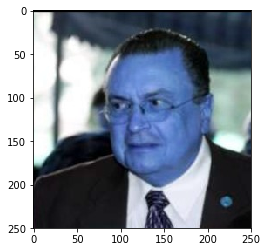

In [43]:
im = cv2.imdecode(np.frombuffer(k,np.uint8),1)
plt.imshow(im)
plt.show()

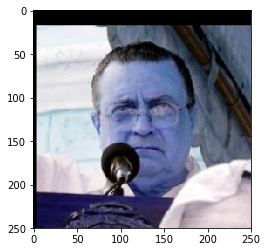

In [45]:
im1 = cv2.imdecode(np.frombuffer(zfile.read(name2),np.uint8),1)
plt.imshow(im1)
plt.show()

In [46]:
src_img = cv2.imdecode(np.frombuffer(zfile.read(name1),np.uint8),1)
src_pts = landmark[name1]

In [47]:
src_pts

[97, 108, 140, 105, 114, 134, 108, 154, 145, 153]

In [48]:
ref_pts = [ [30.2946, 51.6963],[65.5318, 51.5014],
        [48.0252, 71.7366],[33.5493, 92.3655],[62.7299, 92.2041] ]
crop_size = (96, 112)
src_pts = np.array(src_pts).reshape(5,2)

In [64]:
src_pts,ref_pts

(array([[ 97, 108],
        [140, 105],
        [114, 134],
        [108, 154],
        [145, 153]]),
 [[30.2946, 51.6963],
  [65.5318, 51.5014],
  [48.0252, 71.7366],
  [33.5493, 92.3655],
  [62.7299, 92.2041]])

In [65]:
type(src_pts),type(ref_pts)

(numpy.ndarray, list)

In [66]:
s = np.array(src_pts).astype(np.float32)
r = np.array(ref_pts).astype(np.float32)

In [67]:
s,r,type(s),type(r)

(array([[ 97., 108.],
        [140., 105.],
        [114., 134.],
        [108., 154.],
        [145., 153.]], dtype=float32), array([[30.2946, 51.6963],
        [65.5318, 51.5014],
        [48.0252, 71.7366],
        [33.5493, 92.3655],
        [62.7299, 92.2041]], dtype=float32), numpy.ndarray, numpy.ndarray)

In [68]:
tfm = get_similarity_transform_for_cv2(s, r)

In [69]:
face_img = cv2.warpAffine(src_img, tfm, crop_size)

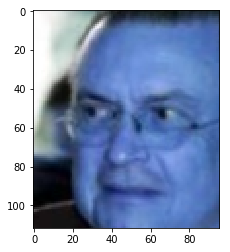

In [71]:
plt.imshow(img1)
plt.show()

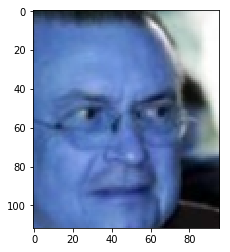

In [75]:
plt.imshow(cv2.flip(img1,1))
plt.show()

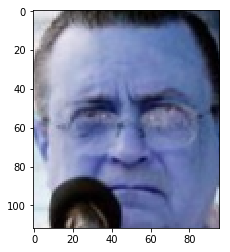

In [72]:
plt.imshow(img2)
plt.show()


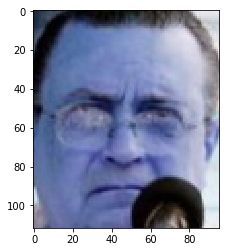

In [77]:
plt.imshow(cv2.flip(img2,1))
plt.show()

In [78]:
len(imglist)

4

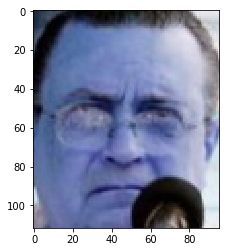

In [83]:
plt.imshow(imglist[3]) 
plt.show()

In [84]:
imglist[0].shape

(112, 96, 3)

In [92]:
imglistt={}
for i in range(len(imglist)):
  imglistt[i] = imglist[i].transpose(2, 0, 1).reshape((1,3,112,96))
  imglistt[i] = (imglistt[i]-127.5)/128.0

In [101]:
img = np.vstack(imglistt)

In [108]:
img

array([[0],
       [1],
       [2],
       [3]])

In [98]:
imglistt

{0: array([[[[ 0.98046875,  0.98046875,  0.94921875, ..., -0.79296875,
           -0.77734375, -0.78515625],
          [ 0.99609375,  0.98828125,  0.98046875, ..., -0.76953125,
           -0.76171875, -0.75390625],
          [ 0.99609375,  0.99609375,  0.99609375, ..., -0.70703125,
           -0.69140625, -0.70703125],
          ...,
          [-0.80859375, -0.81640625, -0.81640625, ..., -0.49609375,
           -0.48046875, -0.44921875],
          [-0.80859375, -0.80078125, -0.80859375, ..., -0.48046875,
           -0.44140625, -0.42578125],
          [-0.79296875, -0.79296875, -0.80859375, ..., -0.44140625,
           -0.42578125, -0.40234375]],
 
         [[ 0.96484375,  0.96484375,  0.93359375, ..., -0.67578125,
           -0.66796875, -0.69140625],
          [ 0.98046875,  0.97265625,  0.96484375, ..., -0.64453125,
           -0.65234375, -0.65234375],
          [ 0.98046875,  0.98046875,  0.98828125, ..., -0.57421875,
           -0.56640625, -0.58203125],
          ...,
          

In [100]:
#arr1 = np.array([1, 2, 3])
#arr2 = np.array([4, 5, 6])
#res = np.vstack([arr1, arr2])
#res

array([[1, 2, 3],
       [4, 5, 6]])